In [1]:
# Import necessary libraries
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [97]:
def setup():
    building_data = pd.read_csv("building_energy_data.csv")
    building_data['TempDifference'] = abs(building_data['OutdoorTemperature'] - building_data['IndoorTemperature'])
    return building_data

In [98]:
def visualize_plot(building_data):
    # Visualize the overall data distribution using a scatterplot
    sns.scatterplot(x="TempDifference", y="EnergyConsumptionBySA", data=building_data)
    plt.title("Scatterplot of Temp Difference and Energy Consumption")
    plt.show()

In [99]:
def findMinArray(building_data):
    # Data seems to suggest that we can calculate a lower bound for energy-consumption/surface-area
    LOWER_BOUND = 40 # number of min temperatures per temperature difference
    min_energy_consumption = {}
    for idx, row in building_data.iterrows():
        diff = abs(row['OutdoorTemperature'] - row['IndoorTemperature'])
        energy_consumption = row['EnergyConsumptionBySA']

        if diff in min_energy_consumption:
            min_array = min_energy_consumption.get(diff)
            if(len(min_array) < LOWER_BOUND):
                min_array.append(energy_consumption)
            else:
                for i in range(len(min_array)):
                    if(energy_consumption < min_array[i]):
                        min_array[i] = energy_consumption 
                        break
        else:
            min_array = []
            min_array.append(energy_consumption)
            min_energy_consumption[diff] = min_array
    return min_energy_consumption

In [100]:
import math

X = []
y = []

building_data = setup()
min_energy_consumption = findMinArray(building_data)
for item in list(min_energy_consumption.keys()):
    vals = min_energy_consumption[item]
    for v in vals:
        v_float = float(v)
        if math.isnan(v_float):
            continue
        else:
            X.append(item)
            y.append(float(v))

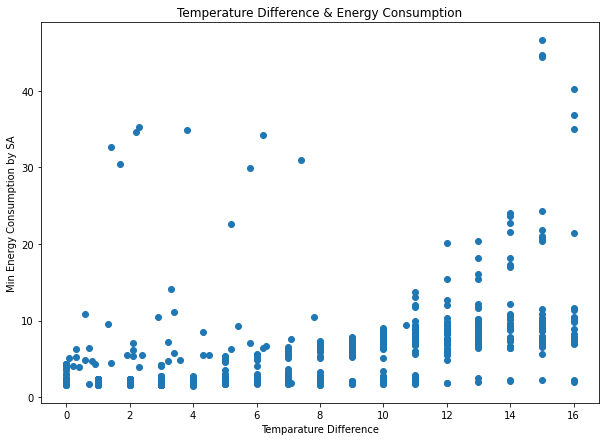

In [ ]:
# Visualize the min data distribution using a scatterplot
plt.scatter(X, y)
plt.title("Temperature Difference & Energy Consumption")
plt.show()

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Parameters after learning from training data
  m = 0.7285817621801861
  c = 0.0
  R = 1.3725295524933676


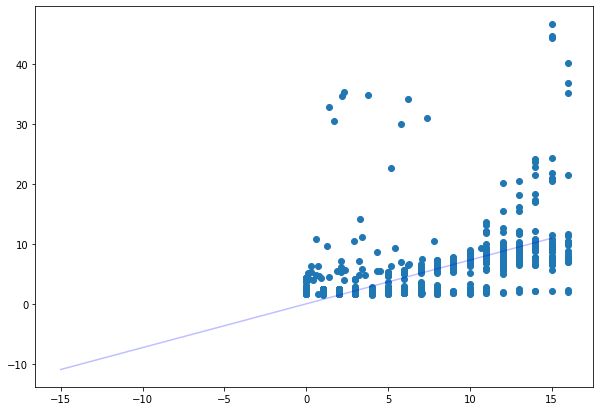

In [102]:
# Reshape data
X = np.array(X).reshape(-1,1)
y = np.array(y)

# Test Train Split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y, test_size=0.2,random_state=10)

# use sklearn's linear regression to learn from the data
lr = LinearRegression(fit_intercept=False)
lr.fit(X,y)
print("Parameters after learning from training data")
print("  m =",lr.coef_[0])
print("  c =",lr.intercept_)
print("  R =",1/lr.coef_[0])

# Plot results of lr1
plt.scatter(X, y)
plt.plot([-15,15], np.array([[1 ,-15],[1,15]]) @ [lr.intercept_, lr.coef_[0]], color="blue", alpha=0.25)

In [103]:
# PREDICTION 
def predict(temp_diff):
    arr = lr.predict(np.array(temp_diff).reshape(-1,1))
    return arr[0]

In [104]:
print(predict(5))

3.6429088109009307
